#### Ejercicio 1: Red recurrente lineal y determinista

Dada una red neuronal lineal que cuya dinámica satisface la siguiente ecuación:

![Ecuación 1](./images/ec1.jpg)

Donde **r** es el vector de respuestas neuronales (tasas de disparo), **W** es la matriz de pesos sinápticos y **h(t)** es una entrada a la red (ruído, estímulos erternos, entradas de otras redes, etc.)

Considere una red con dos neuronas, una ercitatoria y una inhibitoria 1, que están conectadas recíprocamente con peso de la misma magnitud **a**.

a) Dibuje la red de dos neuronas (con sus coneriones y respectivos pesos). Usen Paint, no se gasten mucho. (5 puntos)

b)¿Cómo es la matriz de pesos W? ¿Cuáles son sus autovalores? (5 puntos)

![Ejercicios 1.a y 1.b](./images/ej1ab.jpeg)

c) Resuelva para conseguir la dinámica del sistema de manera analítica, partiendo de condición inicial con las dos neuronas activas (r=(1,1)^T) y sin ninguna entrada (es decir,h=0). Para esto, calcule los autovalores y autovectores y haga el desarrollo diagonalizando la matriz como vimos en clase. Puede usar Wolfram Alpha para invertir matrices. (10 puntos).

![Ejercicio 1.c Parte 1](./images/ej1c_1.jpeg)
![Ejercicio 1.c Parte 2](./images/ej1c_2.jpeg)

d) Grafique la trayectoria del sistema en 2D (con r1 en el eje horizontal y r2 en el eje vertical). (5 puntos)

e) Grafique la trayectoria de cada neurona vs tiempo. (5 puntos)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def neuron_e(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) + np.sin(a*t)))/tau

def neuron_i(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) - np.sin(a*t)))/tau

def r_dot(t, a, tau):
    return (neuron_e(t, a, tau), neuron_i(t, a, tau))

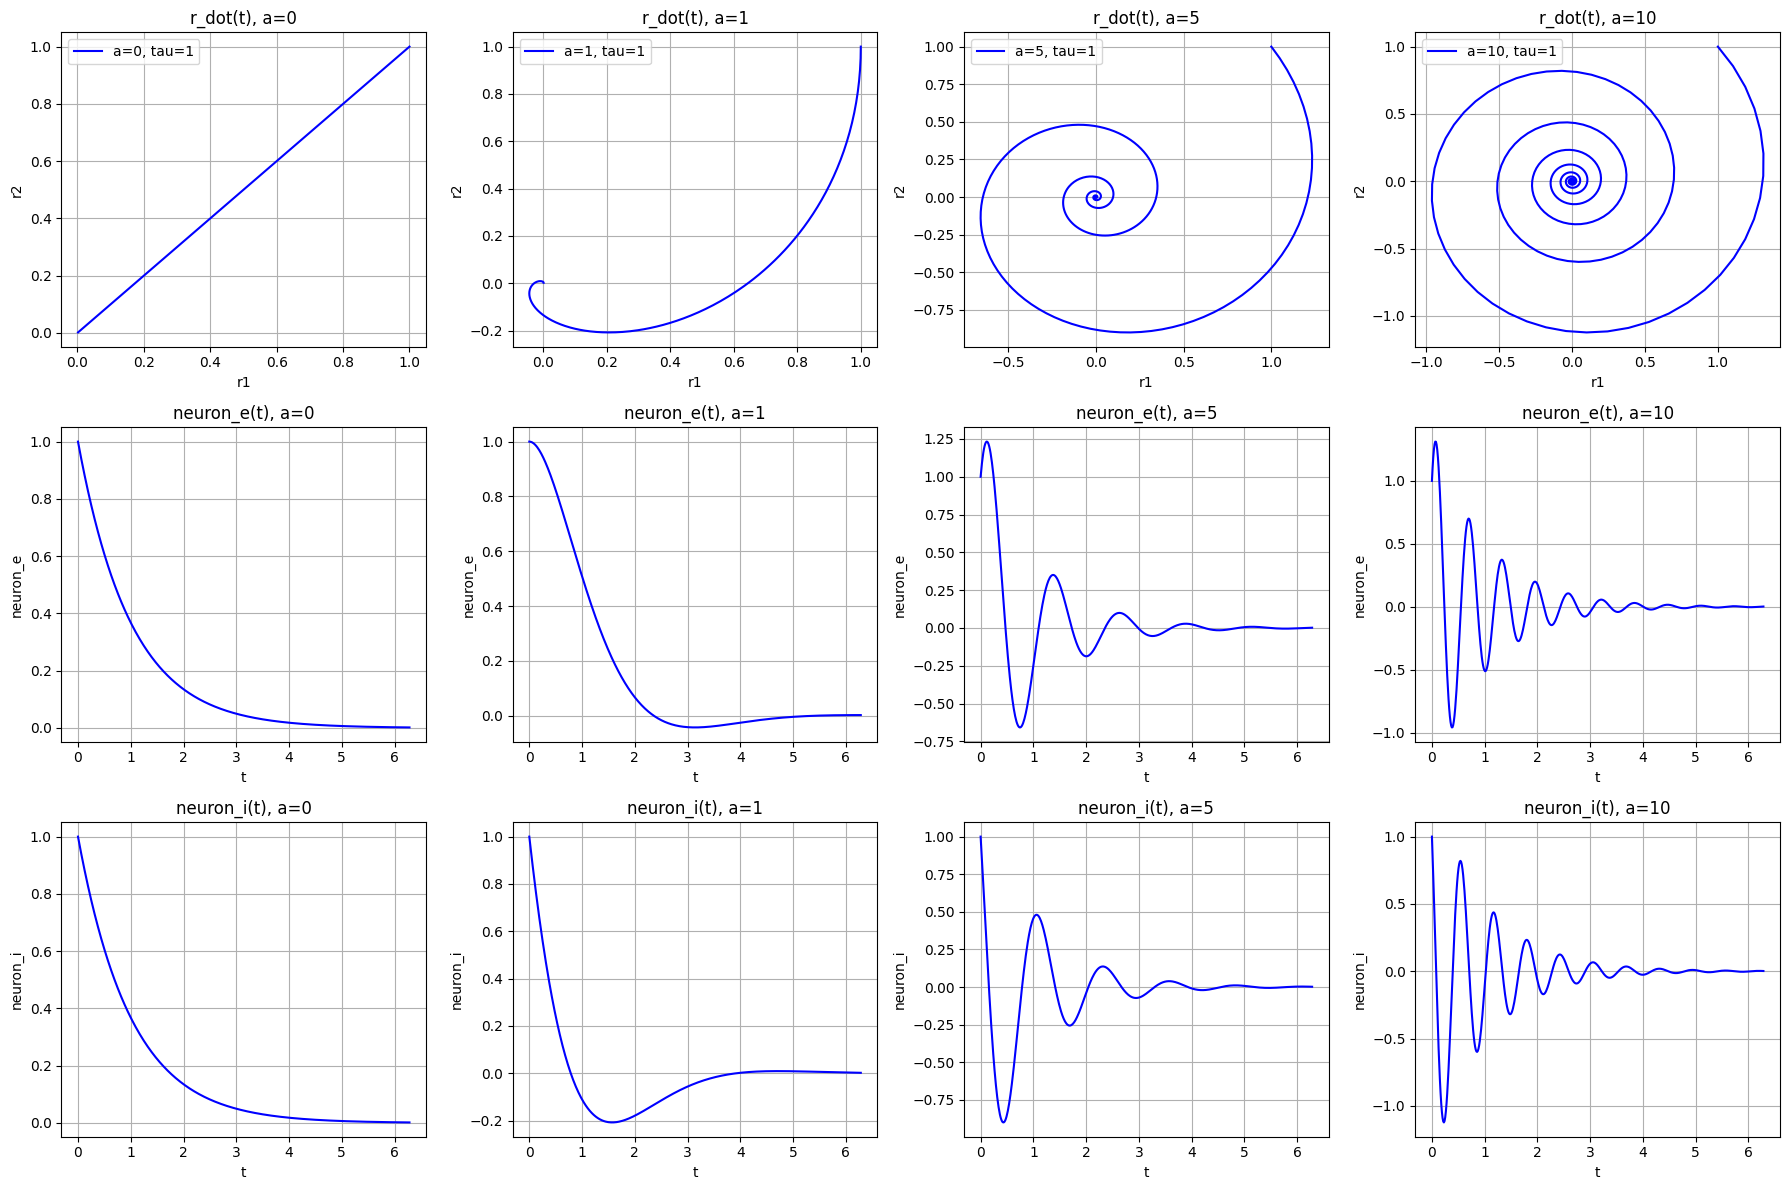

In [5]:
tau = 1
t_values = np.linspace(0, 2*np.pi, 500)

# Valores de "a" para iterar
a_values = [0, 1, 5, 10]

# Crear la figura y los subplots
fig, axs = plt.subplots(3, len(a_values), figsize=(18, 12))

for i, a in enumerate(a_values):
    # Plot de r_dot(t)
    x, y = r_dot(t_values, a, tau)
    axs[0, i].plot(x, y, label=f'a={a}, tau={tau}', c='b')
    axs[0, i].set_xlabel('r1')
    axs[0, i].set_ylabel('r2')
    axs[0, i].set_title(f'r_dot(t), a={a}')
    axs[0, i].legend()
    axs[0, i].grid(True)

    # Plot de la neurona 1 contra el tiempo
    axs[1, i].plot(t_values, neuron_e(t_values, a, tau), c='b')
    axs[1, i].set_xlabel('t')
    axs[1, i].set_ylabel('neuron_e')
    axs[1, i].set_title(f'neuron_e(t), a={a}')
    axs[1, i].grid(True)

    # Plot de la neurona 2 contra el tiempo
    axs[2, i].plot(t_values, neuron_i(t_values, a, tau), c='b')
    axs[2, i].set_xlabel('t')
    axs[2, i].set_ylabel('neuron_i')
    axs[2, i].set_title(f'neuron_i(t), a={a}')
    axs[2, i].grid(True)

plt.tight_layout()
plt.show()

#### Ejercicio 2

a) Convierta la ecuación diferencial de arriba a su versión en tiempo discreto de la forma:

![Ecuación 2](./images/ec2.jpg)

relacionando B a W (asumiendo que dt<<1). (5 puntos)


![Ejercicio 2.a](./images/ej2a.jpeg)

b) Simule el sistema, muestreando ruido de ht de una distribución normal bivariada con covarianza proporcional a la matriz identidad (es decir, ruido independiente para cada neurona con desvío estándar σ). Con numpy, pueden muestrear usando h = np.random.normal(scale=0.01, size=(n_timesteps, 2)). Utilice a=10, dt=0.01 y empiece con las mismas condiciones iniciales que el Ejercicio 1c. Haga los mismos gráficos que en el Ejercicio 1d y 1e. (10 puntos)

c) Corra esta simulación K=50 veces, ploteando los puntos como puntos (es decir, como gráfico de dispersión en vez de traza) y coloreando todos los puntos correspondientes a cierto tiempo del mismo color (es decir, 50 puntos de un color para t=0, 50 puntos de otro color para t=1, etc.). ¿Qué observa en la varianza de rt en el tiempo? (5 puntos)

In [6]:
def r_discrete(t0, tf, dt, a):
    t_values = np.arange(t0, tf, dt)                                # creo el vector de tiempos
    h = np.random.normal(scale=0.01, size=(t_values.size, 2, 1))    # t_values x 2 x 1 
    r = np.array([[[1], [1]]])                                      # 1 x 2 x 1
    w = np.array([[0, a], [-a, 0]])                                 # 2 x 2
    i = np.identity(2)                                              # 2 x 2

    for index in range(t_values.size):
        next_r = ((i*(1-dt) + dt*w) @ r[index])                     # esto me devuelve 2 x 1
        next_r = next_r + h[index]                                  # le agrego el ruido
        next_r = np.reshape(next_r, (1, 2, 1))                      # para poder concatenarlo necesito 1 x 2 x 1 -> hago reshape
        r = np.concatenate((r, next_r), axis=0)                     # concateno

    return r

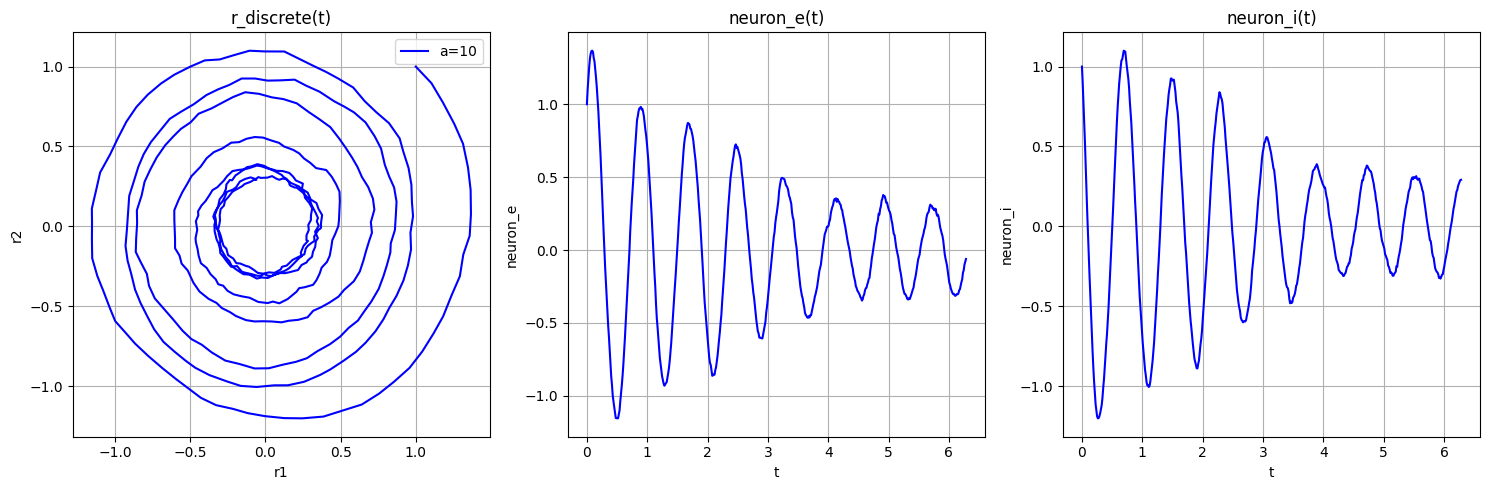

In [17]:
# Condiciones iniciales
t0 = 0
tf = 2*np.pi
dt= 0.01
a = 10

r = r_discrete(t0, tf, dt, a)

n1 = np.resize(r[:, 0], t_values.size)
n2 = np.resize(r[:, 1], t_values.size)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = 'b'

# Plot de r_discrete(t)
axs[0].plot(n1, n2, label=f'a={a}', color=color)
axs[0].set_xlabel('r1')
axs[0].set_ylabel('r2')
axs[0].set_title('r_discrete(t)')
axs[0].legend()
axs[0].grid(True)

# Plot de la neurona 1 contra el tiempo
axs[1].plot(t_values, n1, color=color)
axs[1].set_xlabel('t')
axs[1].set_ylabel('neuron_e')
axs[1].set_title('neuron_e(t)')
axs[1].grid(True)

# Plot de la neurona 2 contra el tiempo
axs[2].plot(t_values, n2, color=color)
axs[2].set_xlabel('t')
axs[2].set_ylabel('neuron_i')
axs[2].set_title('neuron_i(t)')
axs[2].grid(True)

plt.tight_layout()
plt.show()